Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'ASD_Traits'],
      dtype='object')


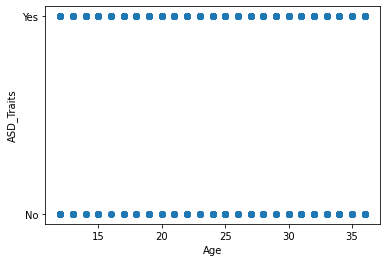

            Case_No           A1           A2           A3           A4  \
count   1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean     527.500000     0.563567     0.448767     0.401328     0.512334   
std      304.407895     0.496178     0.497604     0.490400     0.500085   
min        1.000000     0.000000     0.000000     0.000000     0.000000   
25%      264.250000     0.000000     0.000000     0.000000     0.000000   
50%      527.500000     1.000000     0.000000     0.000000     1.000000   
75%      790.750000     1.000000     1.000000     1.000000     1.000000   
max     1054.000000     1.000000     1.000000     1.000000     1.000000   
median   527.500000     1.000000     0.000000     0.000000     1.000000   

                 A5           A6           A7           A8           A9  \
count   1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean       0.524668     0.576850     0.649905     0.459203     0.489564   
std        0.499628     

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Toddler Autism dataset July 2018.csv')
#Data Cleaning and visualization
data.isnull().sum() #checking for missing values
print(data.columns)
plt.scatter(data['Age_Mons'], data['ASD_Traits'])
plt.xlabel('Age')
plt.ylabel('ASD_Traits')
plt.show() #checing for outliers in age 
statistics = data.describe()
medians = data.median()
statistics.loc['median'] = medians
print(statistics)
#accourding to results of describe, there are no missing values (count= 1054 for all), no outliers (min and max for all attributes is logical), dataset is not skewed as the mean and median for all attributes are close


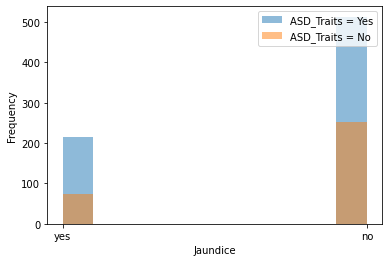

In [88]:
plt.hist(data[data['ASD_Traits']=='Yes']['Jaundice'], alpha=0.5, label='ASD_Traits = Yes')
plt.hist(data[data['ASD_Traits']=='No']['Jaundice'], alpha=0.5, label='ASD_Traits = No')
plt.xlabel('Jaundice')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

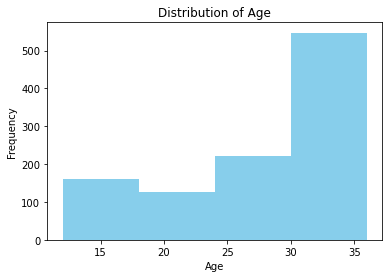

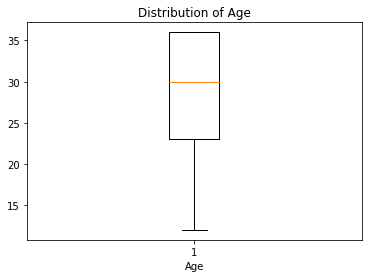

In [89]:
#visualizing Age in a histogram
plt.hist(data['Age_Mons'], bins=4, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()
#Since data seems to be concentrated in last cluster, we will also visualize data using boxplot
plt.boxplot(data['Age_Mons'])
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()
#The boxplot shows no outliers however,50% of data is below 30 and 50% are above 30 months 

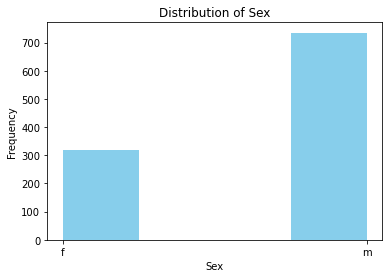

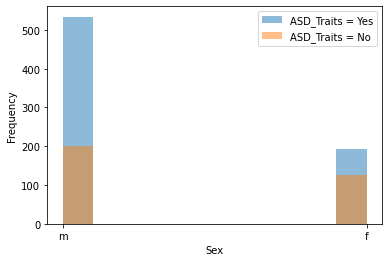

In [90]:
#visualizing Sex attribute
plt.hist(data['Sex'], bins=4, color='skyblue')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
plt.show()
#the histogram shows that around 70% of the data are males

# create a histogram showing the distribution of ASD_Trait with respect to sex
plt.hist(data[data['ASD_Traits']=='Yes']['Sex'], alpha=0.5, label='ASD_Traits = Yes')
plt.hist(data[data['ASD_Traits']=='No']['Sex'], alpha=0.5, label='ASD_Traits = No')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
Pacifica            8
mixed               8
Native Indian       3
Name: Ethnicity, dtype: int64


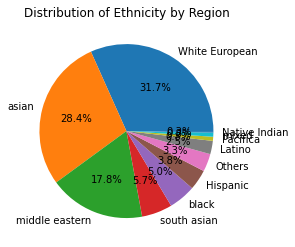

In [91]:
#visualizing Ethinicity
ethnicity_counts = data['Ethnicity'].value_counts()
print(ethnicity_counts)
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ethnicity by Region')
plt.show()

#We can see that most most data is distributed among Ethnicities "White European", "Asian", and "Middle Eastern"

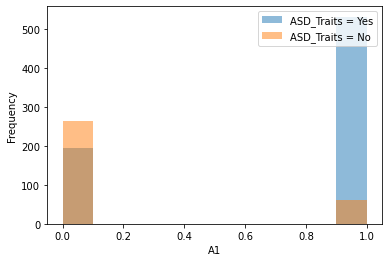

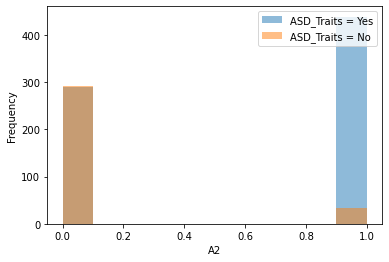

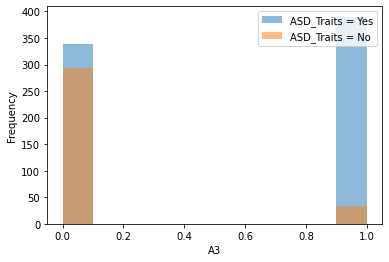

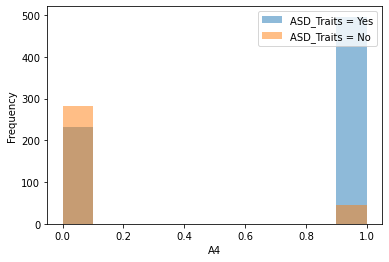

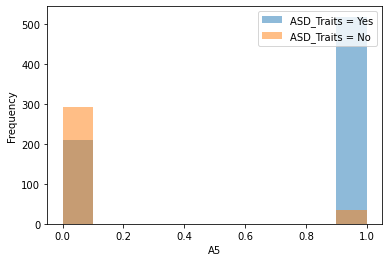

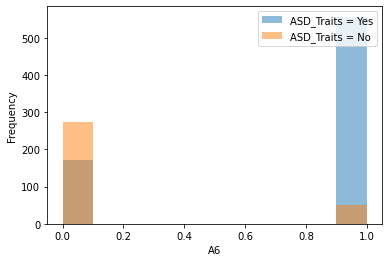

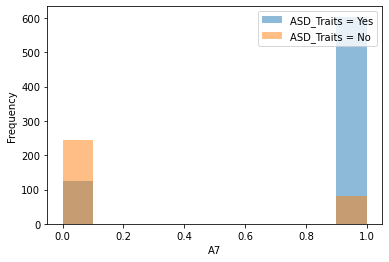

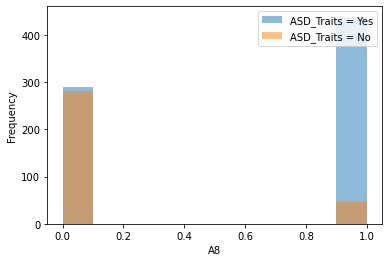

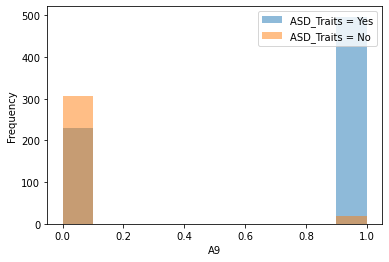

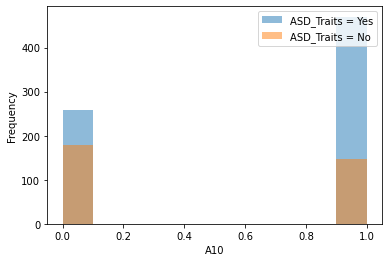

In [92]:
# Create a bar plot for each attribute with respect to ASD_Traits
for col in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']:
    plt.hist(data[data['ASD_Traits']=='Yes'][col], alpha=0.5, label='ASD_Traits = Yes')
    plt.hist(data[data['ASD_Traits']=='No'][col], alpha=0.5, label='ASD_Traits = No')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()


In [93]:
#Selecting features relevant to SVM Model
from scipy.stats import chi2_contingency

# Create a contingency table for each feature and the target variable
contingency_tables = []
for feature in data.columns:
    contingency_table = pd.crosstab(data[feature], data['ASD_Traits'])
    contingency_tables.append(contingency_table)

# Calculate chi-squared values and p-values for each contingency table
chi_squared_values = []
p_values = []
for contingency_table in contingency_tables:
    chi_squared, p, dof, expected = chi2_contingency(contingency_table)
    chi_squared_values.append(chi_squared)
    p_values.append(p)

# Create a dataframe to store the results
results_df = pd.DataFrame({'Feature': data.columns, 'Chi-Squared': chi_squared_values, 'p-value': p_values})

# Display the results in descending order of p-value
results_df.sort_values('p-value', ascending=True, inplace=True)
print(results_df)
#According to the results of the chi-suqared test, the two features 'Case_No' and 'Family_mem_with_ASD' have p-values greater than 0.05 which means they are not significantly related to the target variable and may not be useful for predicting ASD traits.
#Hence, 'Family_mem_with_ASD' will not be considered while building the SVM model
#data.drop('Case_No', axis=1, inplace=True)
data.drop('Case_No', axis=1, inplace=True)
data.drop('Family_mem_with_ASD', axis=1, inplace=True)
data.drop('Qchat-10-Score', axis=1, inplace=True)

                   Feature  Chi-Squared        p-value
18              ASD_Traits  1049.324266  3.413525e-230
12          Qchat-10-Score  1054.000000  4.336525e-220
9                       A9   348.821326   7.652682e-78
6                       A6   339.263970   9.229228e-76
5                       A5   332.002152   3.521437e-74
7                       A7   331.745509   4.005126e-74
4                       A4   266.830911   5.566898e-60
1                       A1   265.337325   1.178016e-59
2                       A2   224.389727   9.975027e-51
8                       A8   190.464319   2.517566e-43
3                       A3   175.115060   5.650417e-40
10                     A10    33.300959   7.894371e-09
14               Ethnicity    43.571293   3.929551e-06
13                     Sex    14.043553   1.786252e-04
11                Age_Mons    56.625261   1.882686e-04
15                Jaundice     5.427049   1.982715e-02
17  Who completed the test     3.788061   4.354478e-01
0         

In [94]:
#Splitting Age into 4 bins
bins = [11, 18, 24, 30, 36]
labels = ['11-18', '18-24', '24-30', '30-36']
data['Age'] = pd.cut(data['Age_Mons'], bins=bins, labels=labels)
data.head()
#print(data.dtypes)
#Drop the original Age_Mons column
data.drop('Age_Mons', axis=1, inplace=True)


In [95]:
#Splitting Ethnicity in bins
data['Ethnicity'].replace({'south asian': 'asian'}, inplace=True) #I merged 'South_Asian' and 'Asian' in one category do data is more relevant 
data['Ethnicity'].replace({'Latino': 'Latino/Hispanic', 'Hispanic': 'Latino/Hispanic'}, inplace=True) #merging Latino and Hispanic in one category since they have common culture and countries
data['Ethnicity'] = data['Ethnicity'].replace(['Pacifica', 'mixed', 'Native Indian'], 'Others') #merging Ethnicities that have very low frequency in one 'Others' category
ethnicity_countss = data['Ethnicity'].value_counts()
print(ethnicity_countss) #we now have 6 categories for Ethnicity attribute
data = data.astype('category')

data['Who completed the test'].replace({'Health care professional': 'Health Care Professional'}, inplace=True)

asian              359
White European     334
middle eastern     188
Latino/Hispanic     66
Others              54
black               53
Name: Ethnicity, dtype: int64


In [96]:
# import required libraries
from sklearn.preprocessing import OneHotEncoder

# define the categorical columns to be encoded as binary
cat_cols = ['A1','A2', 'A3','A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex', 'Ethnicity', 'Jaundice','Who completed the test','ASD_Traits', 'Age']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical features
cat_data = pd.DataFrame(encoder.fit_transform(data[cat_cols]))

# Update column names
new_cols = encoder.get_feature_names(cat_cols)
cat_data.columns = new_cols

# Replace original categorical columns with encoded features
data = data.drop(cat_cols, axis=1)
data = pd.concat([data, cat_data], axis=1)




In [97]:
data.drop(['A1_0', 'A2_0', 'A3_0', 'A4_0','A5_0', 'A6_0', 'A7_0', 'A8_0', 'A9_0', 'A10_0', 'Sex_f', 'Jaundice_no', 'ASD_Traits_No'], axis=1, inplace=True)

In [99]:
# count_ones = data.sum(axis=0)

# # Print the column names and their count of 1s
# for col_name, count in count_ones.iteritems():
#     print(f"{col_name}: {count}")
print(data.columns)

Index(['A1_1', 'A2_1', 'A3_1', 'A4_1', 'A5_1', 'A6_1', 'A7_1', 'A8_1', 'A9_1',
       'A10_1', 'Sex_m', 'Ethnicity_Latino/Hispanic', 'Ethnicity_Others',
       'Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle eastern', 'Jaundice_yes',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'ASD_Traits_Yes', 'Age_11-18',
       'Age_18-24', 'Age_24-30', 'Age_30-36'],
      dtype='object')


In [120]:
#Splitting data into training data and testing data with 20% of data used for testing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# split the data into features (X) and target variable (y)
sample_data = data.sample(n=15, random_state=47)

# drop the selected rows from the original dataframe
data = data.drop(sample_data.index)
y = data['ASD_Traits_Yes']
X = data.drop('ASD_Traits_Yes', axis=1)
# split the data into training and testing sets, with 20% of the data used for testing
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Initialize the SVM model with regularization parameter C
C = 0.05
svm_model = SVC(kernel='rbf', C=C)

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f1:.2f}')

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{cm}')


Accuracy: 0.96, Precision: 0.95, Recall: 1.00, F1 Score: 0.98
Confusion Matrix: 
[[ 32   6]
 [  0 119]]


In [109]:
sample_y = sample_data['ASD_Traits_Yes']
sample_X = sample_data.drop('ASD_Traits_Yes', axis=1)

In [63]:
# print(X_test.columns)
# print(sample_X.columns)
print(sample_y.head(15))
predictions = svm_model.predict(sample_X)

# print the predictions
print(predictions)
#predicted wrongly 1 case only out of 15, which is case 1025. around 6.6 % error on sample size 15

260     1.0
1025    0.0
845     0.0
1005    1.0
88      1.0
457     0.0
184     1.0
986     0.0
367     1.0
558     0.0
96      1.0
31      0.0
86      0.0
319     0.0
529     1.0
Name: ASD_Traits_Yes, dtype: float64
[1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]


Accuracy: 0.9299363057324841
Precision: 0.9576271186440678
recall: 0.9495798319327731
F1-Score: 0.9535864978902954


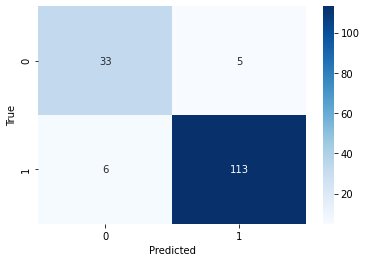

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
lr_model = LogisticRegression(penalty='l1', solver='saga', max_iter=150, C=0.05)#C>=0.2 is causing overfitting
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# recall score
recall = recall_score(y_test, y_pred)
print('recall:', recall)

# f1-score
f1score = f1_score(y_test, y_pred)
print('F1-Score:', f1score)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Confusion Matrix:
[[ 32   6]
 [  3 116]]


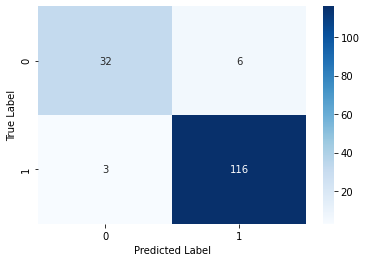

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.88        38
         1.0       0.95      0.97      0.96       119

    accuracy                           0.94       157
   macro avg       0.93      0.91      0.92       157
weighted avg       0.94      0.94      0.94       157

Training Accuracy: 1.0
Test Accuracy: 0.9426751592356688


In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#create a decision tree model with default parameters
tree_model = DecisionTreeClassifier()

#fit the model to the training data
tree_model.fit(X_train, y_train)

#make predictions on the test data
y_pred = tree_model.predict(X_test)

#generate a confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:") 
print(cm)

#visualize the confusion matrix using Matplotlib
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#generating a classification report
cr = classification_report(y_test, y_pred) 
print("Classification Report:") 
print(cr)

#comparing performance scores on the test and training data sets
train_score = tree_model.score(X_train, y_train) 
test_score = tree_model.score(X_test, y_test) 
print("Training Accuracy:", train_score) 
print("Test Accuracy:", test_score)

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'max_depth': [1, 3, 5, 7, 9]}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Use GridSearchCV to search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'max_depth': 7}
Best cross-validation score: 0.90


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.97      0.97      0.97       119

    accuracy                           0.96       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.96      0.96      0.96       157

Confusion Matrix:


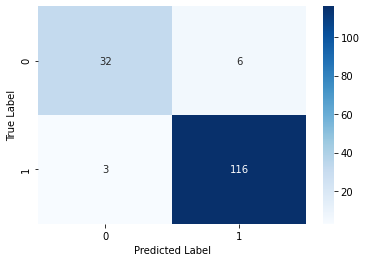

In [150]:
from sklearn.tree import DecisionTreeClassifier

# Specify the optimal depth obtained from cross-validation
optimal_depth = 7

# Create a new decision tree with the specified depth
dt_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)

# Fit the decision tree on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the performance of the decision tree using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d") 
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#print(confusion_matrix(y_test, y_pred))


In [152]:
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)
print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)

Training Accuracy: 0.9824561403508771
Test Accuracy: 0.9554140127388535


In [154]:
#parameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create a decision tree classifier
dtmodel = DecisionTreeClassifier()

# Perform a grid search over the parameter grid
grid_search = GridSearchCV(dtmodel, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best set of parameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train a new model using the best set of parameters on the entire training set
best_dtmodel = DecisionTreeClassifier(**grid_search.best_params_)
best_dtmodel.fit(X_train, y_train)

# Evaluate the performance of the new model on the test set
y_pred_test = best_dtmodel.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test accuracy: ", accuracy_test)
# 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8 are the values of the optimized hyperparameters after parameter tuning using grid search on the decision tree model.

# A max_depth of 8 means that the maximum depth of the decision tree is 8 levels, which limits the complexity of the model and helps prevent overfitting. A min_samples_leaf of 1 means that each leaf node in the tree must have at least one sample, which may result in a more complex model, but can capture more fine-grained distinctions in the data. A min_samples_split of 8 means that a node can only be split if it has at least 8 samples, which also helps prevent overfitting by ensuring that each split is based on a sufficient number of samples.

# Overall, these values suggest a well-tuned model that balances complexity with generalizability and should perform well on new data.

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.897942857142857
Test accuracy:  0.9299363057324841


In [156]:
#making predictions
print(sample_y.head(15))
predictions =  best_dtmodel.predict(sample_X)
# print the predictions
print(predictions)

833     0.0
965     1.0
1026    0.0
984     1.0
682     1.0
282     1.0
238     1.0
855     0.0
98      0.0
1027    1.0
823     1.0
73      0.0
626     0.0
1048    0.0
641     0.0
Name: ASD_Traits_Yes, dtype: float64
[0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.]


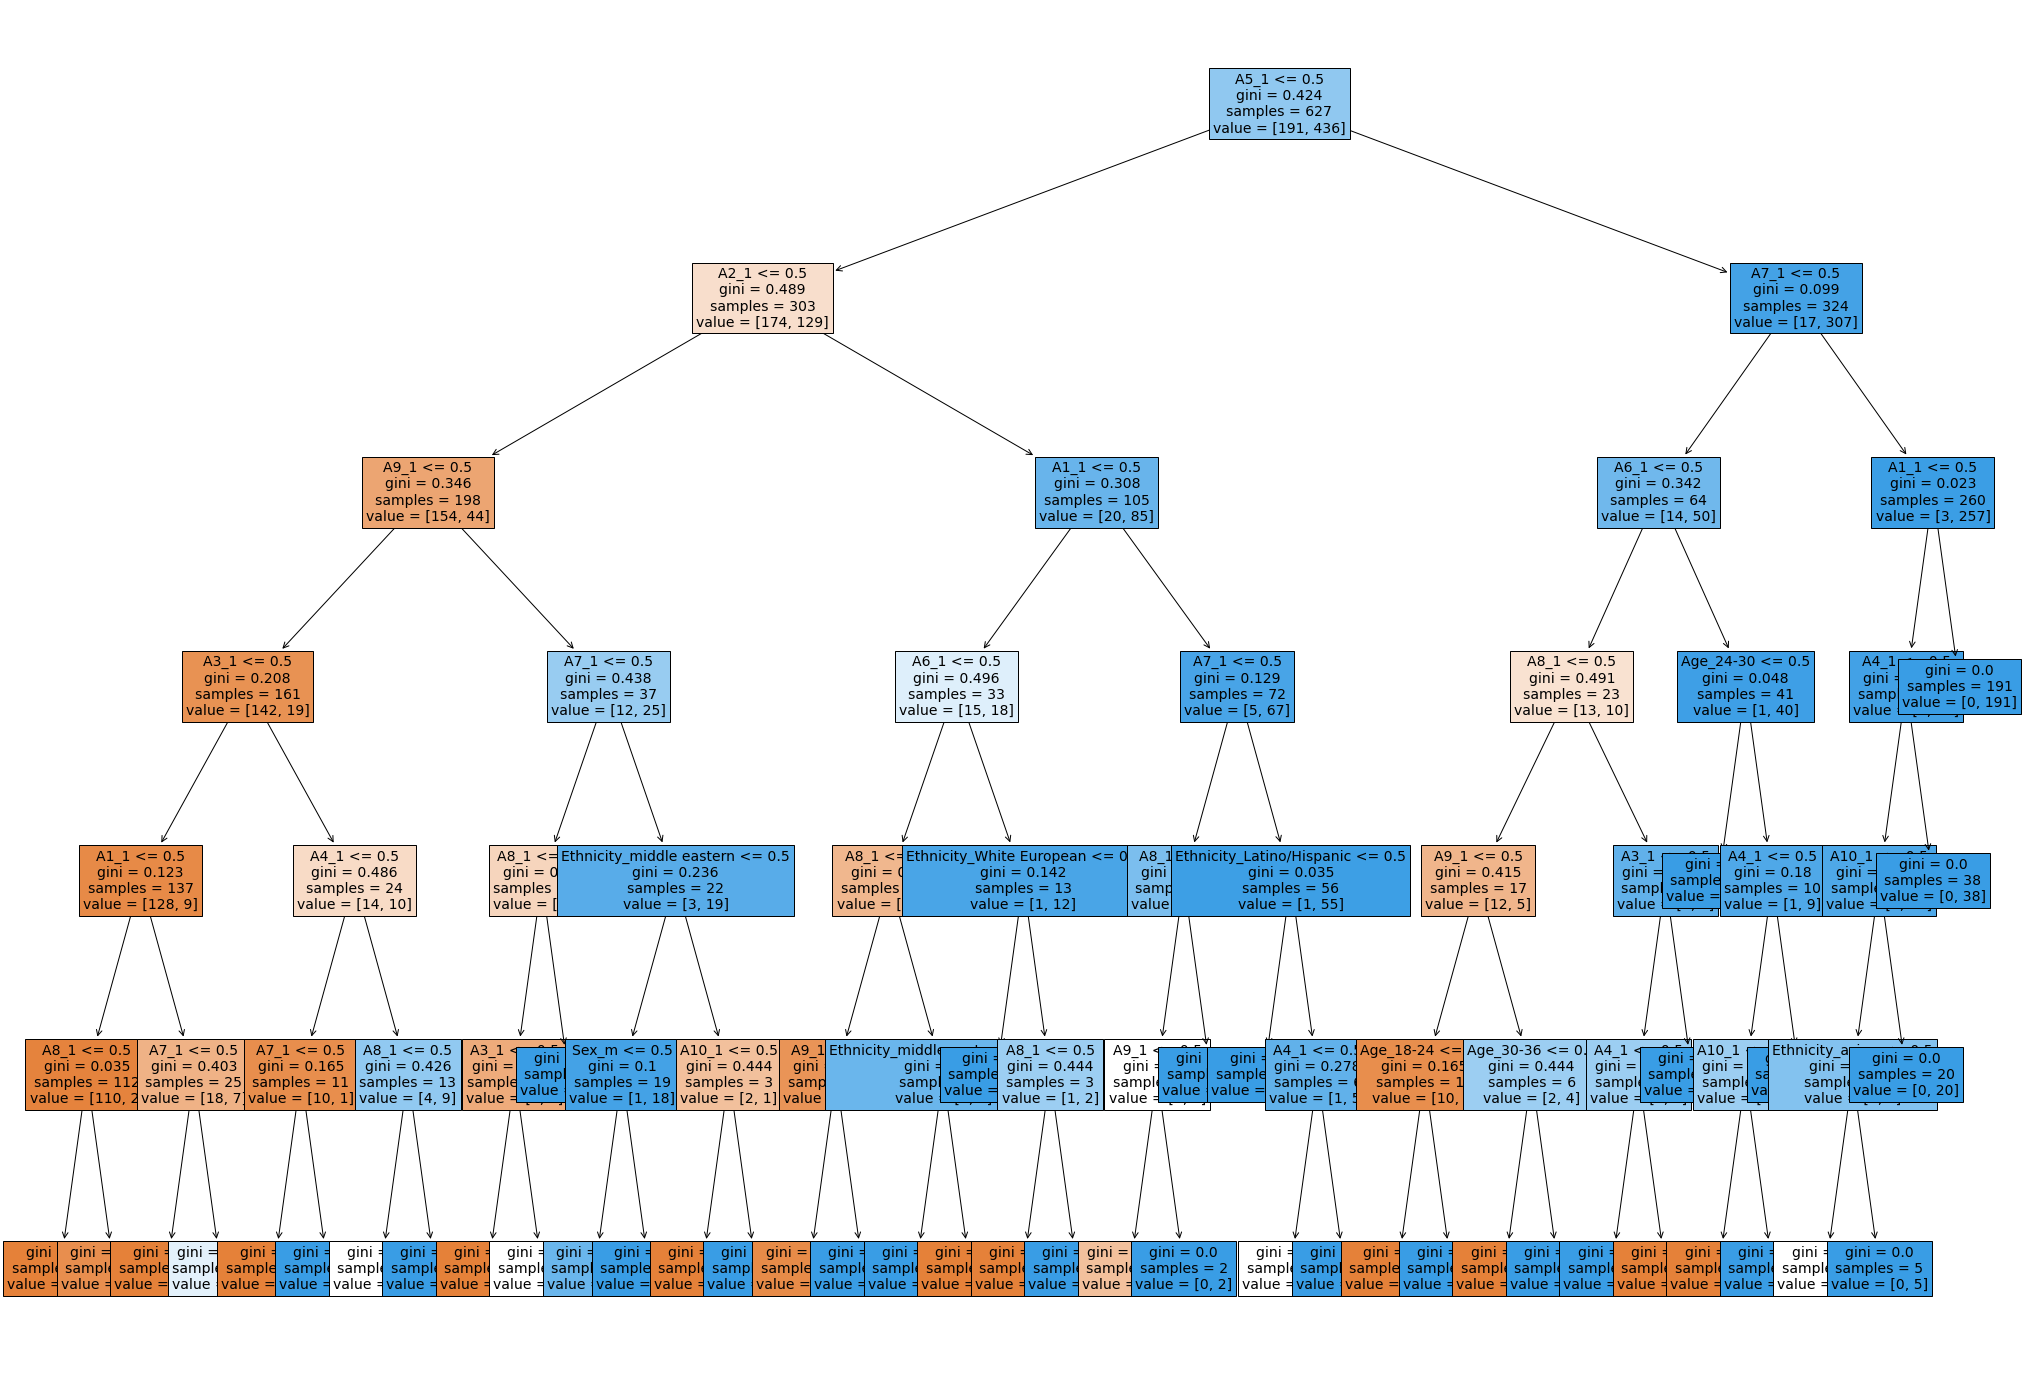

In [173]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
fig, ax = plt.subplots(figsize=(35, 25))
plot_tree(best_dtmodel, ax=ax, filled=True, feature_names=X.columns, fontsize=14)
plt.show()
